# DESCRIPTION OF A PROJECT

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


# OBJECTIVES OF THE PROJECT

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary: Loan_Modelling.csvDownload Loan_Modelling.csv
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


In [1]:
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing all the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from train_model import train
from evaluate_model import evaluate

In [3]:
# Importing the data
loan_data = pd.read_csv("Loan_Modelling.csv")

# EDA

In [4]:
# Checking the number of rows and columns in the data
loan_data.shape

(5000, 14)

In [5]:
# Checking the first 5 columnsof the data sets
loan_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Checking the value counts of customers took the personal loan the datasets
loan_data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [7]:
# checking the null values
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Checking for duplicates
loan_data.duplicated().sum()

0

In [9]:
#Checking the info of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# The unique values for the dataset
loan_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
# Checking the statistical description
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Observation
- There are no null values in the dataset
- There are 4520 customers that did not take the personal while 480 customers did.
- There are no duplicate values.

# Visulization 

- Univariant analysis

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

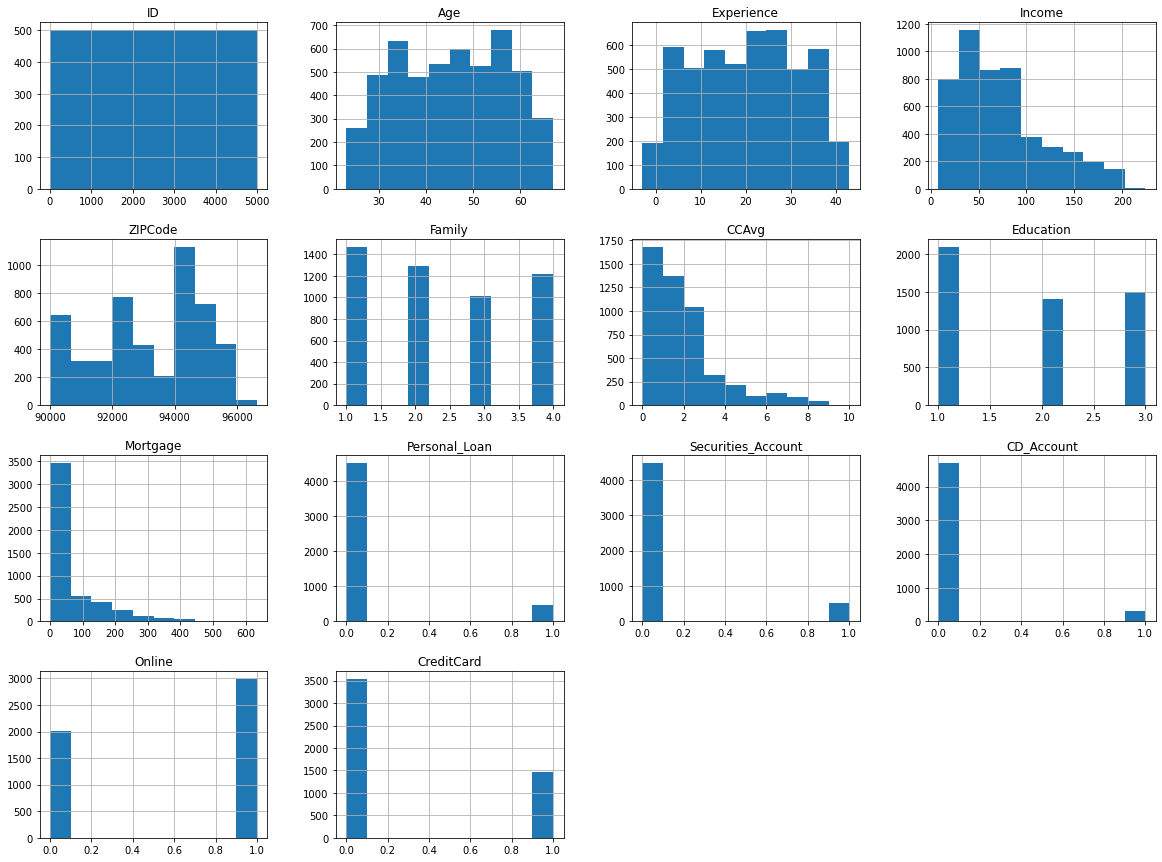

In [14]:
plt.figure(dpi=200)
loan_data.hist(figsize= (20,15))
plt.show

In [15]:
#To get the correlation of the features
corr_loan = loan_data.corr()
corr_loan

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Bivariant Analysis

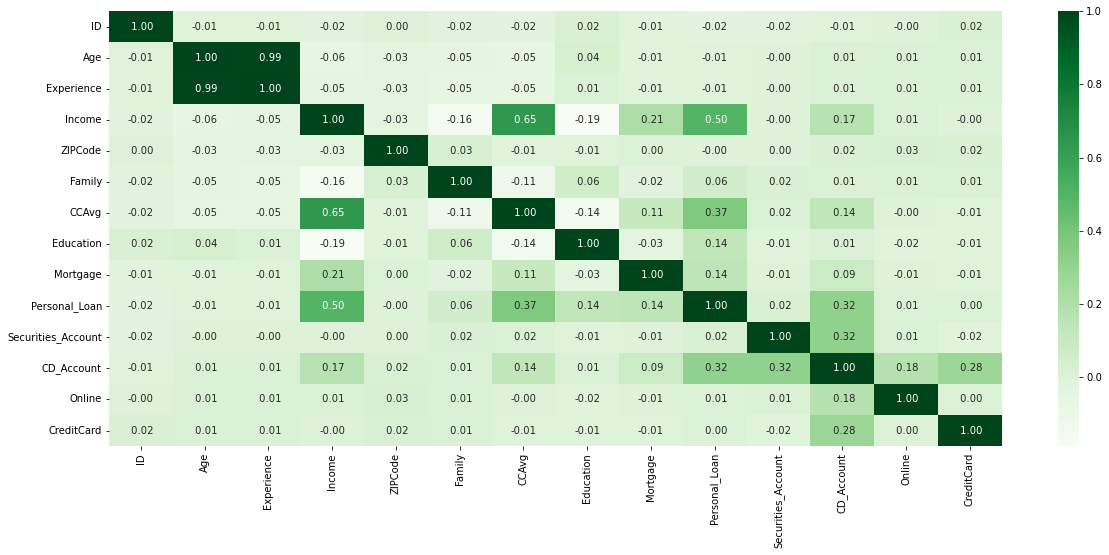

In [37]:
plt.figure(figsize=(20,8));
sns.heatmap(corr_loan,annot=True,fmt=" .2f",cmap="Greens")
plt.show()

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

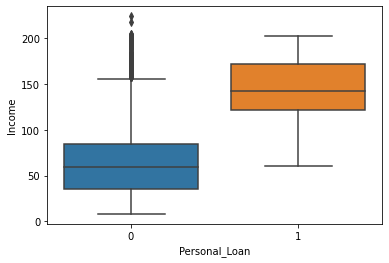

In [17]:
sns.boxplot(loan_data,x="Personal_Loan",y ="Income")

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

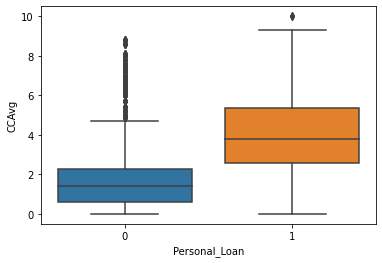

In [18]:
sns.boxplot(loan_data, x= "Personal_Loan",y="CCAvg")

# Observation
- Personal loan and income are highly correlated, and from the graph the number of customer with high income took the personal loan
  compared to the customers that earn low.   
- Customers that took the personal loans have high spending rate using credit card per month.

### Select features and target

In [19]:
X = loan_data.drop("Personal_Loan",axis =1)
y = loan_data["Personal_Loan"]

# Splitting the data

In [20]:
# Splitting the data into train and test
x_train_val, x_test, y_train_val,y_test= train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [21]:
#Splitting the dataset into train,validation and test
x_train,x_val,y_train,y_val= train_test_split(x_train_val,y_train_val,test_size=0.3,random_state=0,stratify=y_train_val)

In [22]:
# checking the shape of the split data
x_train.shape

(2450, 13)

In [23]:
x_val.shape

(1050, 13)

In [24]:
x_test.shape

(1500, 13)

In [25]:
# To get the distribution of the target in the train and validation data
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [26]:
y_val.value_counts(normalize=True)

0    0.90381
1    0.09619
Name: Personal_Loan, dtype: float64

# Logistic Regression

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [28]:
# Normalizing our data
Scaler = StandardScaler()

x_train_sc = Scaler.fit_transform(x_train)
x_test_sc= Scaler.transform(x_test)
x_val_sc = Scaler.transform(x_val)

In [29]:
# Training the model by passing the scaled train data and the target variable
Logis_reg= LogisticRegression()

Logis_reg.fit(x_train_sc, y_train)

LogisticRegression()

In [30]:
# To check the performance of the train,val and test data
Perform_train = Logis_reg.score(x_train_sc,y_train)
Perform_test = Logis_reg.score(x_test_sc,y_test)
Perform_val = Logis_reg.score(x_val_sc,y_val)

print('Performance for Train:',Perform_train)
print('Performance for Test:',Perform_test)
print('Performance for Validation:',Perform_val)

Performance for Train: 0.9493877551020408
Performance for Test: 0.952
Performance for Validation: 0.9561904761904761


 Observation
- This implies that model will approxiamtely predict 95% of the time accurately on both the test and training data
- The model will validate 96% of the time on the validation data.

# Model improvement- Comparison of Metrics

In [31]:
#import the confusion metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [32]:
# Training the scaled data
Logis_reg_model = train(Logis_reg,x_train_sc,y_train)

Train accuracy: 0.9493877551020408


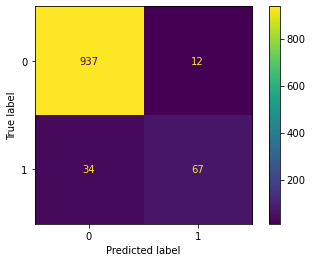

,Accuracy,Precison,Recall,F1
0,0.95619,0.848101,0.663366,0.744444


In [33]:
Logis_reg_df2 = evaluate(Logis_reg,x_val_sc,y_val)
Logis_reg_df2

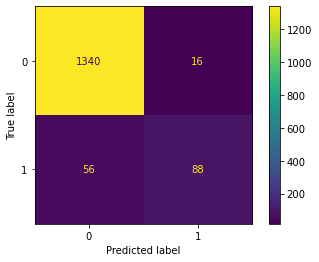

,Accuracy,Precison,Recall,F1
0,0.952,0.846154,0.611111,0.709677


In [34]:
# Evaluating the scaled test data
Logis_reg_df= evaluate(Logis_reg,x_test_sc,y_test)
Logis_reg_df

 Observation
- Out of 144 customers that bought the  personal loans, the model was able to predict 88 customers correctly and 56 customers incorrectly
- Out of 104 customers that was predicted to have bought the personal loan, 88 customers was predictly correctly and 16 not take to take
  personal loans

# Model improvement- Data

In [35]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [50]:
#using the balancedata function
def bal_data(x,y,smote_type):
    x_res,y_res = smote_type.fit_resample(x,y)
    return x_res,y_res

In [51]:
# Balancing the data using Smote and Adasyn
smote = SMOTE(random_state=0)
Ran_over = RandomOverSampler(random_state=0)

In [52]:
x_train_smote,y_train_smote = bal_data(x_train_sc,y_train,smote)
x_train_Ran_over,y_train_Ran_over = bal_data(x_train_sc,y_train,Ran_over)

In [ ]:
# Passing the untrained model using smote and RandomOverSmapler

Train accuracy: 0.8826185101580135


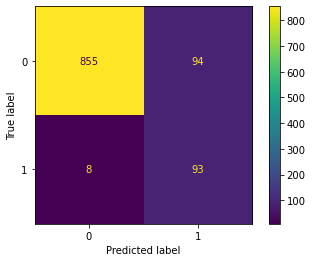

,Accuracy,Precison,Recall,F1
0,0.902857,0.497326,0.920792,0.645833


In [56]:
Logis_reg_over = train(Logis_reg,x_train_Ran_over,y_train_Ran_over)
df_over = evaluate(Logis_reg_over, x_val_sc,y_val)
df_over

Train accuracy: 0.8826185101580135


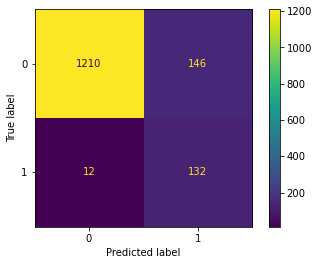

,Accuracy,Precison,Recall,F1
0,0.894667,0.47482,0.916667,0.625592


In [53]:
Logis_reg_over = train(Logis_reg,x_train_Ran_over,y_train_Ran_over)
df_over = evaluate(Logis_reg_over, x_test_sc,y_test)
df_over

Train accuracy: 0.9020316027088036


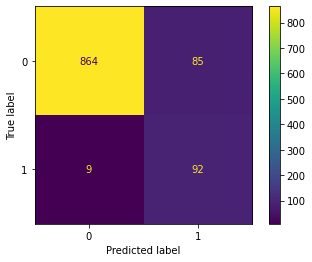

,Accuracy,Precison,Recall,F1
0,0.910476,0.519774,0.910891,0.661871


In [57]:
# Using Smote
Logis_reg_som = train(Logis_reg,x_train_smote,y_train_smote)
df_som = evaluate(Logis_reg_som,x_val_sc, y_val)
df_som

Train accuracy: 0.9020316027088036


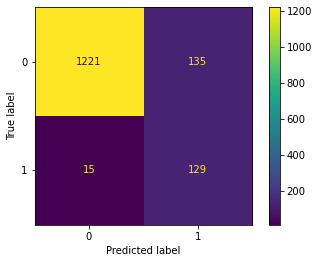

,Accuracy,Precison,Recall,F1
0,0.9,0.488636,0.895833,0.632353


In [55]:
# Using Smote
Logis_reg_som = train(Logis_reg,x_train_smote,y_train_smote)
df_som = evaluate(Logis_reg_som,x_test_sc, y_test)
df_som

In [ ]:
-Observation
- Out of 

# DecisionTree implementation

In [59]:
#instatiating our decision tree
decision_tree = DecisionTreeClassifier(random_state=0)

In [60]:
#train the split data
d_tree_model = train(decision_tree,x_train,y_train)

Train accuracy: 1.0


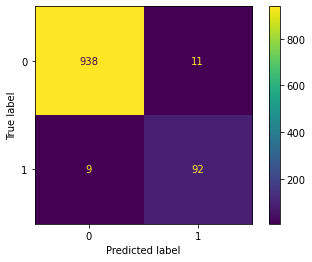

,Accuracy,Precison,Recall,F1
0,0.980952,0.893204,0.910891,0.901961


In [62]:
#evaluating the model on validation data
decision_tree_result=evaluate(d_tree_model,x_val,y_val)
decision_tree_result

# Observation
- The training accuracy is 100% as a result of overfitting that decision tree is prone to.
- Out of 101 customers that bought the personal loan,92 was predicted correctly by the model
  and 9 customers we predicted wrongly not to have taken the loan(Recall)
- Out of 103 customers that the model predicted to have taken the loan, 92 was predicted
 correctly and 11 was predicted wrongly by the model.(Precision)

# Visualizing the Tree

In [58]:
# using the function plot_decison_tree to get the feature
feat_names = list(X.columns)

def plot_decision_tree(dec_tree):
    plt.figure(figsize=(20,30))
    feat_names = list(X.columns)
    tree.plot_tree(dec_tree,feature_names=feat_names,class_names=True,
                  filled=True,node_ids=True, fontsize = 9)
    plt.show()

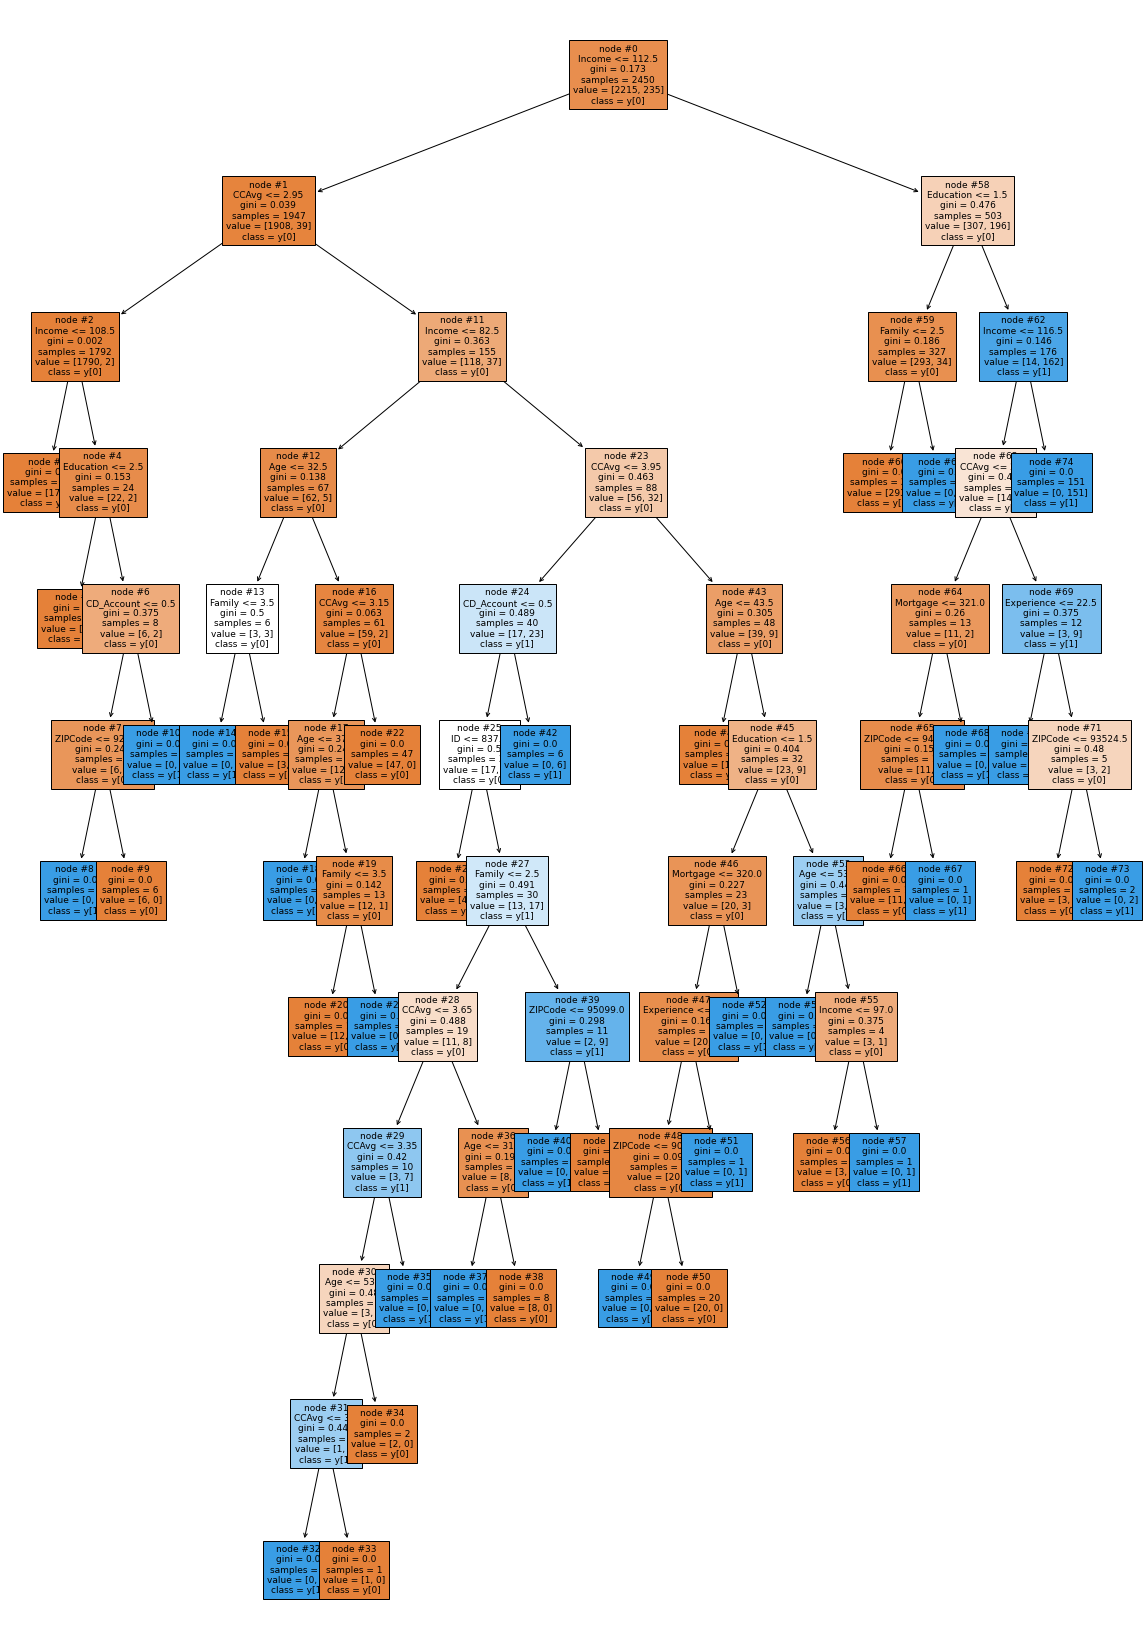

In [63]:
plot_decision_tree(d_tree_model)

# Model Improvement

In [67]:
# To prevent overfitting, we need to pre-prune
dtree_2 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8},max_depth=3)

#calling the model
dtree2_model =train(dtree_2,x_train,y_train)

Train accuracy: 0.9518367346938775


- The train accuracy has reduced after pre-pruning

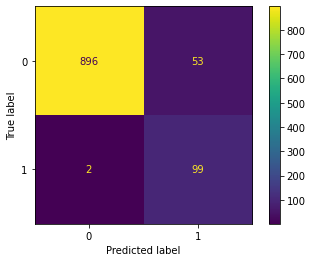

,Accuracy,Precison,Recall,F1
0,0.947619,0.651316,0.980198,0.782609


In [70]:
#evaluating the model on both validation and test data
dtree_2_df = evaluate(dtree2_model,x_val,y_val)
dtree_2_df

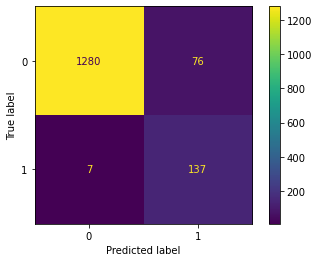

,Accuracy,Precison,Recall,F1
0,0.944667,0.643192,0.951389,0.767507


In [71]:
dtree_2_dftest = evaluate(dtree2_model,x_test,y_test)
dtree_2_dftest

# Observation
- It can be observed that decision tree model performed well than other models used.
 The recall improved which implies that our False negatives which we want to reduce
 was achieved   based on the business requirement and the objective of the project

# Feature Importance

In [82]:

importance = dtree2_model.feature_importances_
def plot_importance(importances):
     indices = np.argsort(importance)
     plt.figure(figsize=(12,12))
     plt.title("Features Importance")
     plt.barh(range(len(indices)),importance[indices],color= "red",align="center")
     plt.yticks(range(len(indices)),[feat_names[i]for i in indices])
     plt.xlabel("Relative Importance")

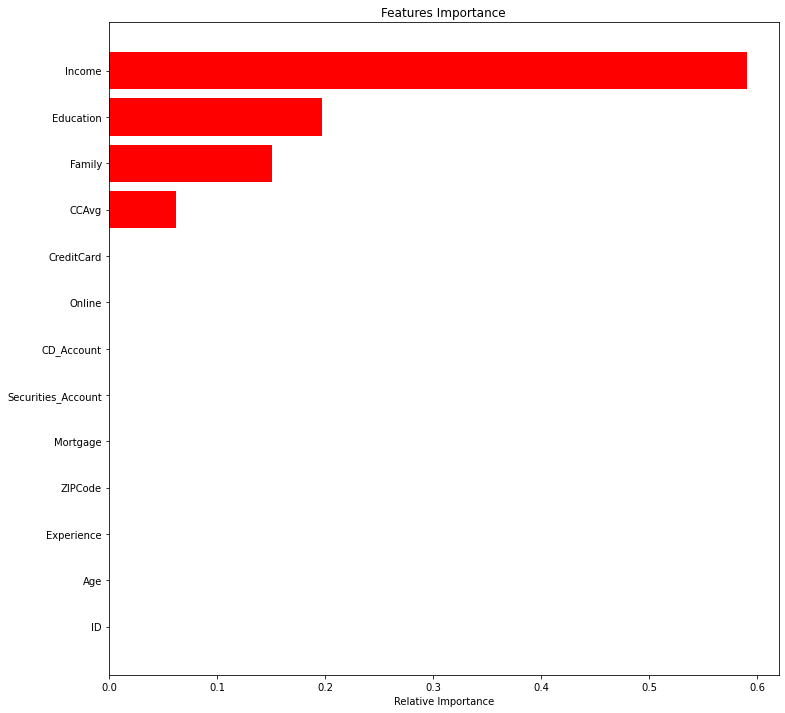

In [83]:
plot_importance(importance)

# Observation
- The following are the important features:
- Income
- Education
- Family
- CCAvg

- This implies the higher the income the more the customer will want to deposit and 
  and also qualify to get the personal loan.
- Highly educated customers will tend to have good high paying jobs this will make
  them eligible for purchasing the personal loan.
- The larger the family the more they will  earn more through various means and also tend to need more funds 
  which can also make them eligible for the personal loan.
- The higher the spending limit on the Credit card for the customer the higher 
  the probability the customer will be willing to buy the personal loan.
    
# Segment of Customers to be Targeted

- The customers with large family size.
- Customers with high income
- Customers that are well educated.